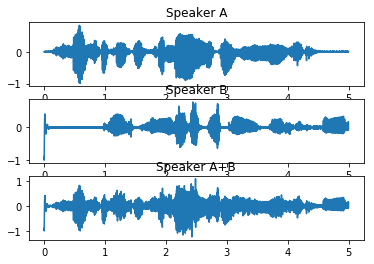

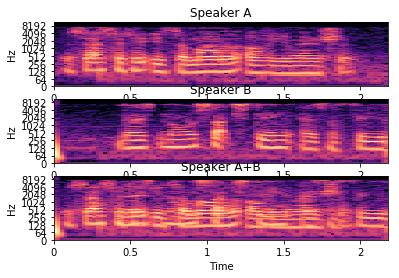

[-0.88958585 -0.997425   -0.8245783  ...  0.01945052  0.01167537
 -0.01070493] [-0.8895859  -0.99742496 -0.8245782  ... -0.02543425 -0.03581838
 -0.04601686]


In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import signal
from IPython.display import Audio



sa = librosa.load("test_data/speakerA.wav")[0]
sb = librosa.load("test_data/speakerB.wav")[0]

t = np.linspace(0, 5, len(sa))
sb = sb[0:len(sa)]
plt.subplot(311)
plt.plot(t, sa)
plt.title("Speaker A")
plt.subplot(312)
plt.plot(t, sb)
plt.title("Speaker B")
plt.subplot(313)
plt.plot(t, sa+sb)
plt.title("Speaker A+B")
plt.show()

fsa = librosa.stft(sa)
fsb = librosa.stft(sb)
fboth = librosa.stft(sa+sb)
plt.subplot(311)
librosa.display.specshow(librosa.amplitude_to_db(fsa, ref=np.max),y_axis='log', x_axis='time')
plt.title("Speaker A")
plt.subplot(312)
librosa.display.specshow(librosa.amplitude_to_db(fsb, ref=np.max),y_axis='log', x_axis='time')
plt.title("Speaker B")
plt.subplot(313)
librosa.display.specshow(librosa.amplitude_to_db(fboth, ref=np.max),y_axis='log', x_axis='time')
plt.title("Speaker A+B")
plt.show()

recover_b = fboth - fsa
recover_sb = librosa.istft(recover_b)
print(recover_sb, sb[0:len(sa)])


Audio(recover_sb, rate=22050)

In [5]:
Audio(sa+sb, rate=22050)